# Interview Based Assesment ML- Q2

Q-2. Imagine you have a dataset where you have different features like Age ,

Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [126]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

#Importing Modules
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score, roc_curve, classification_report, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgboost
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [127]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [128]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [129]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

## Data Cleaning

In [130]:
df['Age']=df['Age'].astype(int)

In [131]:
df.isnull().sum() #NO null values present

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [132]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


<AxesSubplot:>

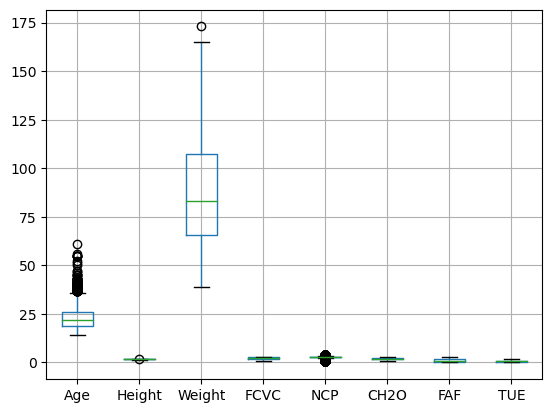

In [133]:
#checking for outliers
df.boxplot()

## Data Vizualization

### Target Variable

Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: NObeyesdad, dtype: float64


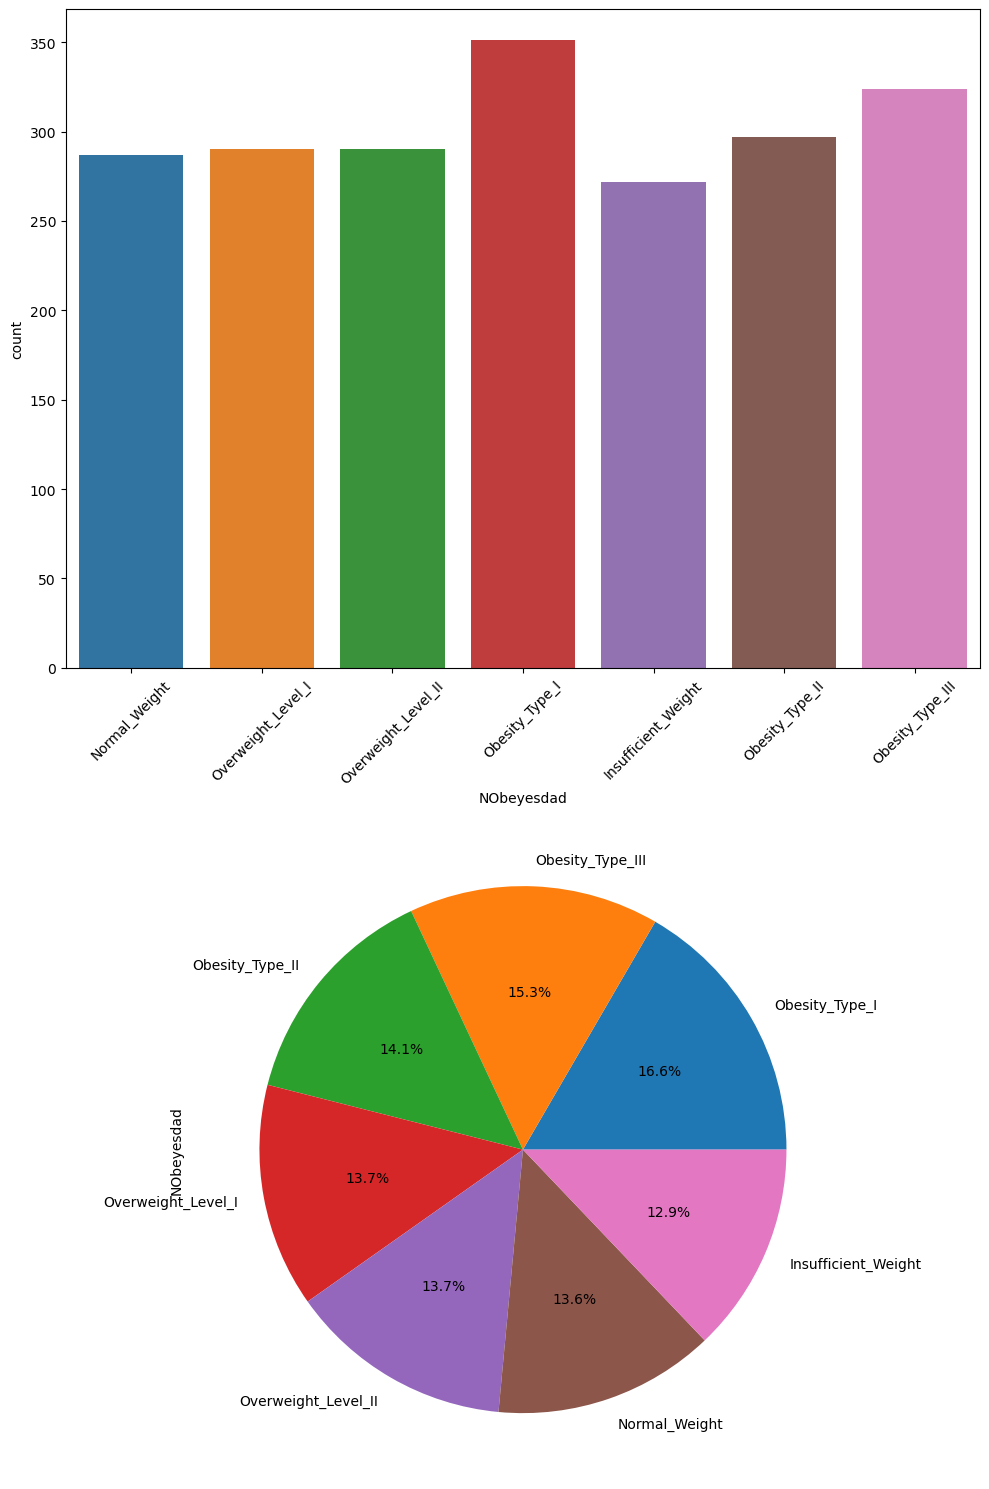

In [134]:
#count plot for the target variable
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sns.countplot(df['NObeyesdad'])
plt.xticks(rotation=45)

plt .subplot(2,1,2)
count=df['NObeyesdad'].value_counts()
count.plot.pie(autopct = '%1.1f%%')
print(df['NObeyesdad'].value_counts()/len(df)*100)
plt.tight_layout()

Insights :-
The Target Data does not seem very imbalanced

## Univariate Analysis of Categorical Values

In [135]:
df.dtypes

Gender                             object
Age                                 int32
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

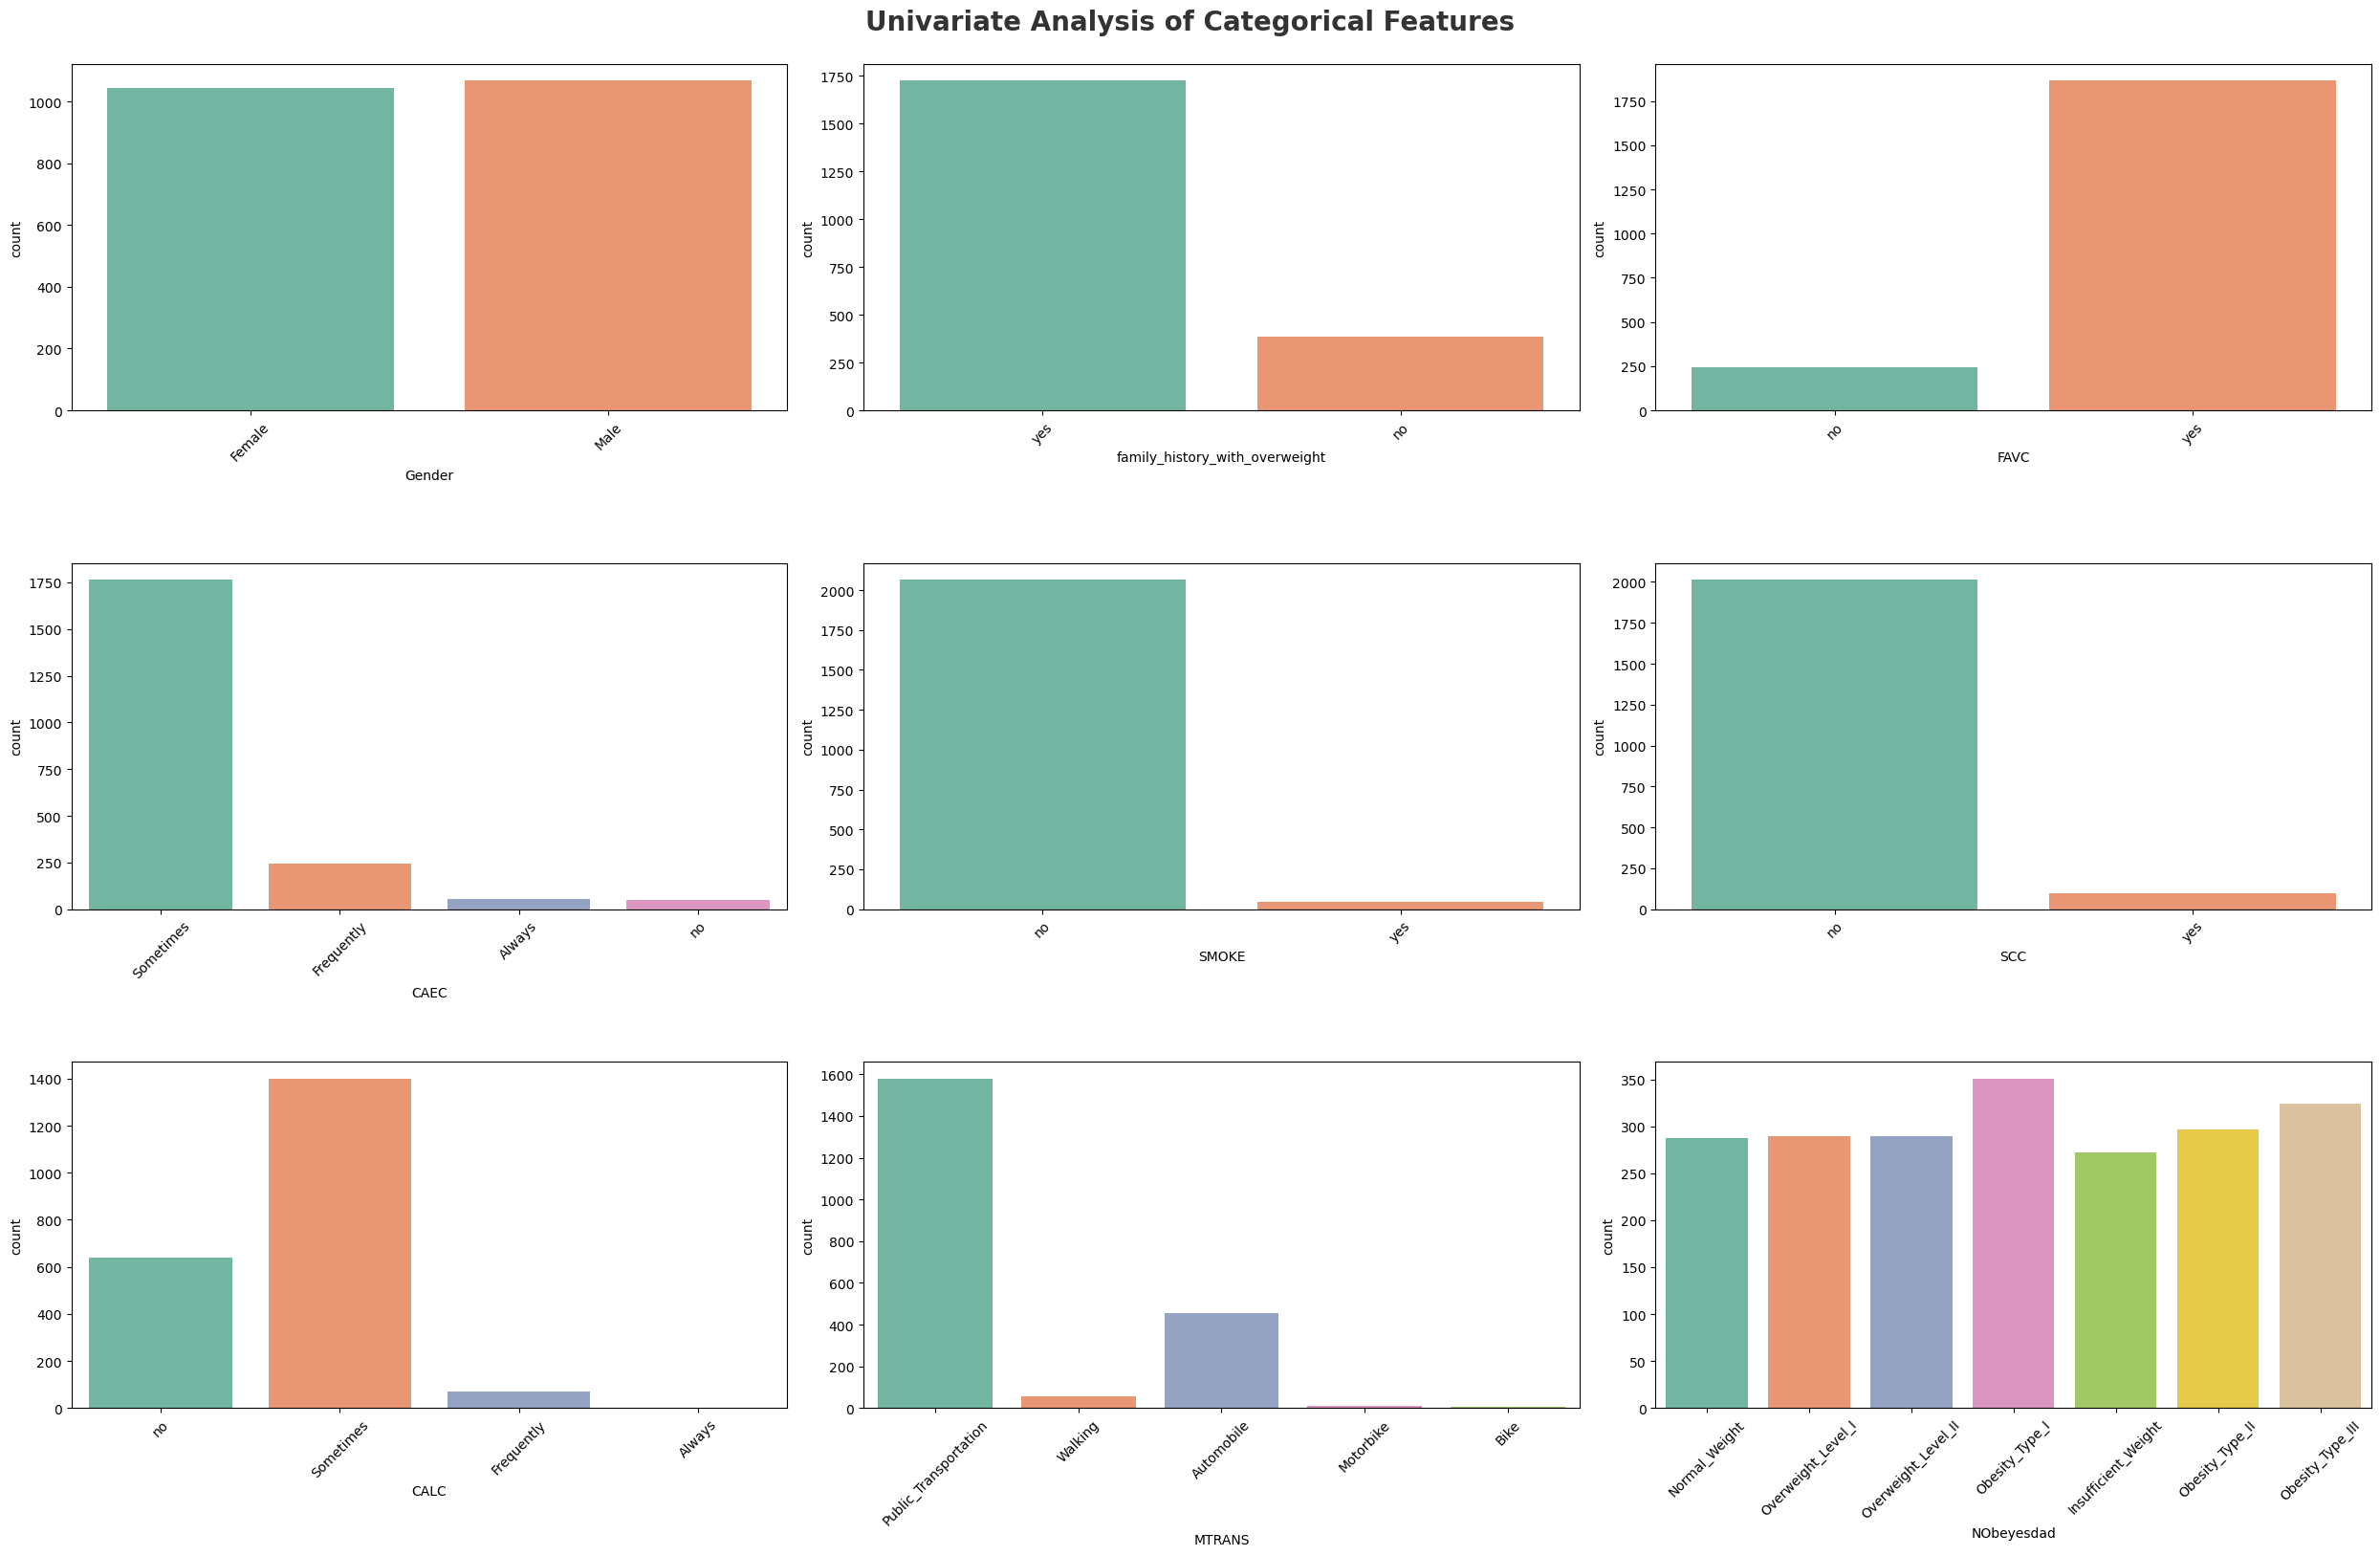

In [136]:
# categorical columns
plt.figure(figsize=(25, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']
for i in range(0, len(category)):
    plt.subplot(4,3,i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

Insights:-

1.The ratio of men and women are almost same in the dataset.

2.Most people intake high calorie food (FAVC)

3.The intake of Food between meals is highly done sometimes.

4.Most people dontsmoke.

5.people dont monitor for the calories they are consuming(SCC)

6.Alcohol is consumed sometimes (CALC)

7.People Mostly take the public transport.



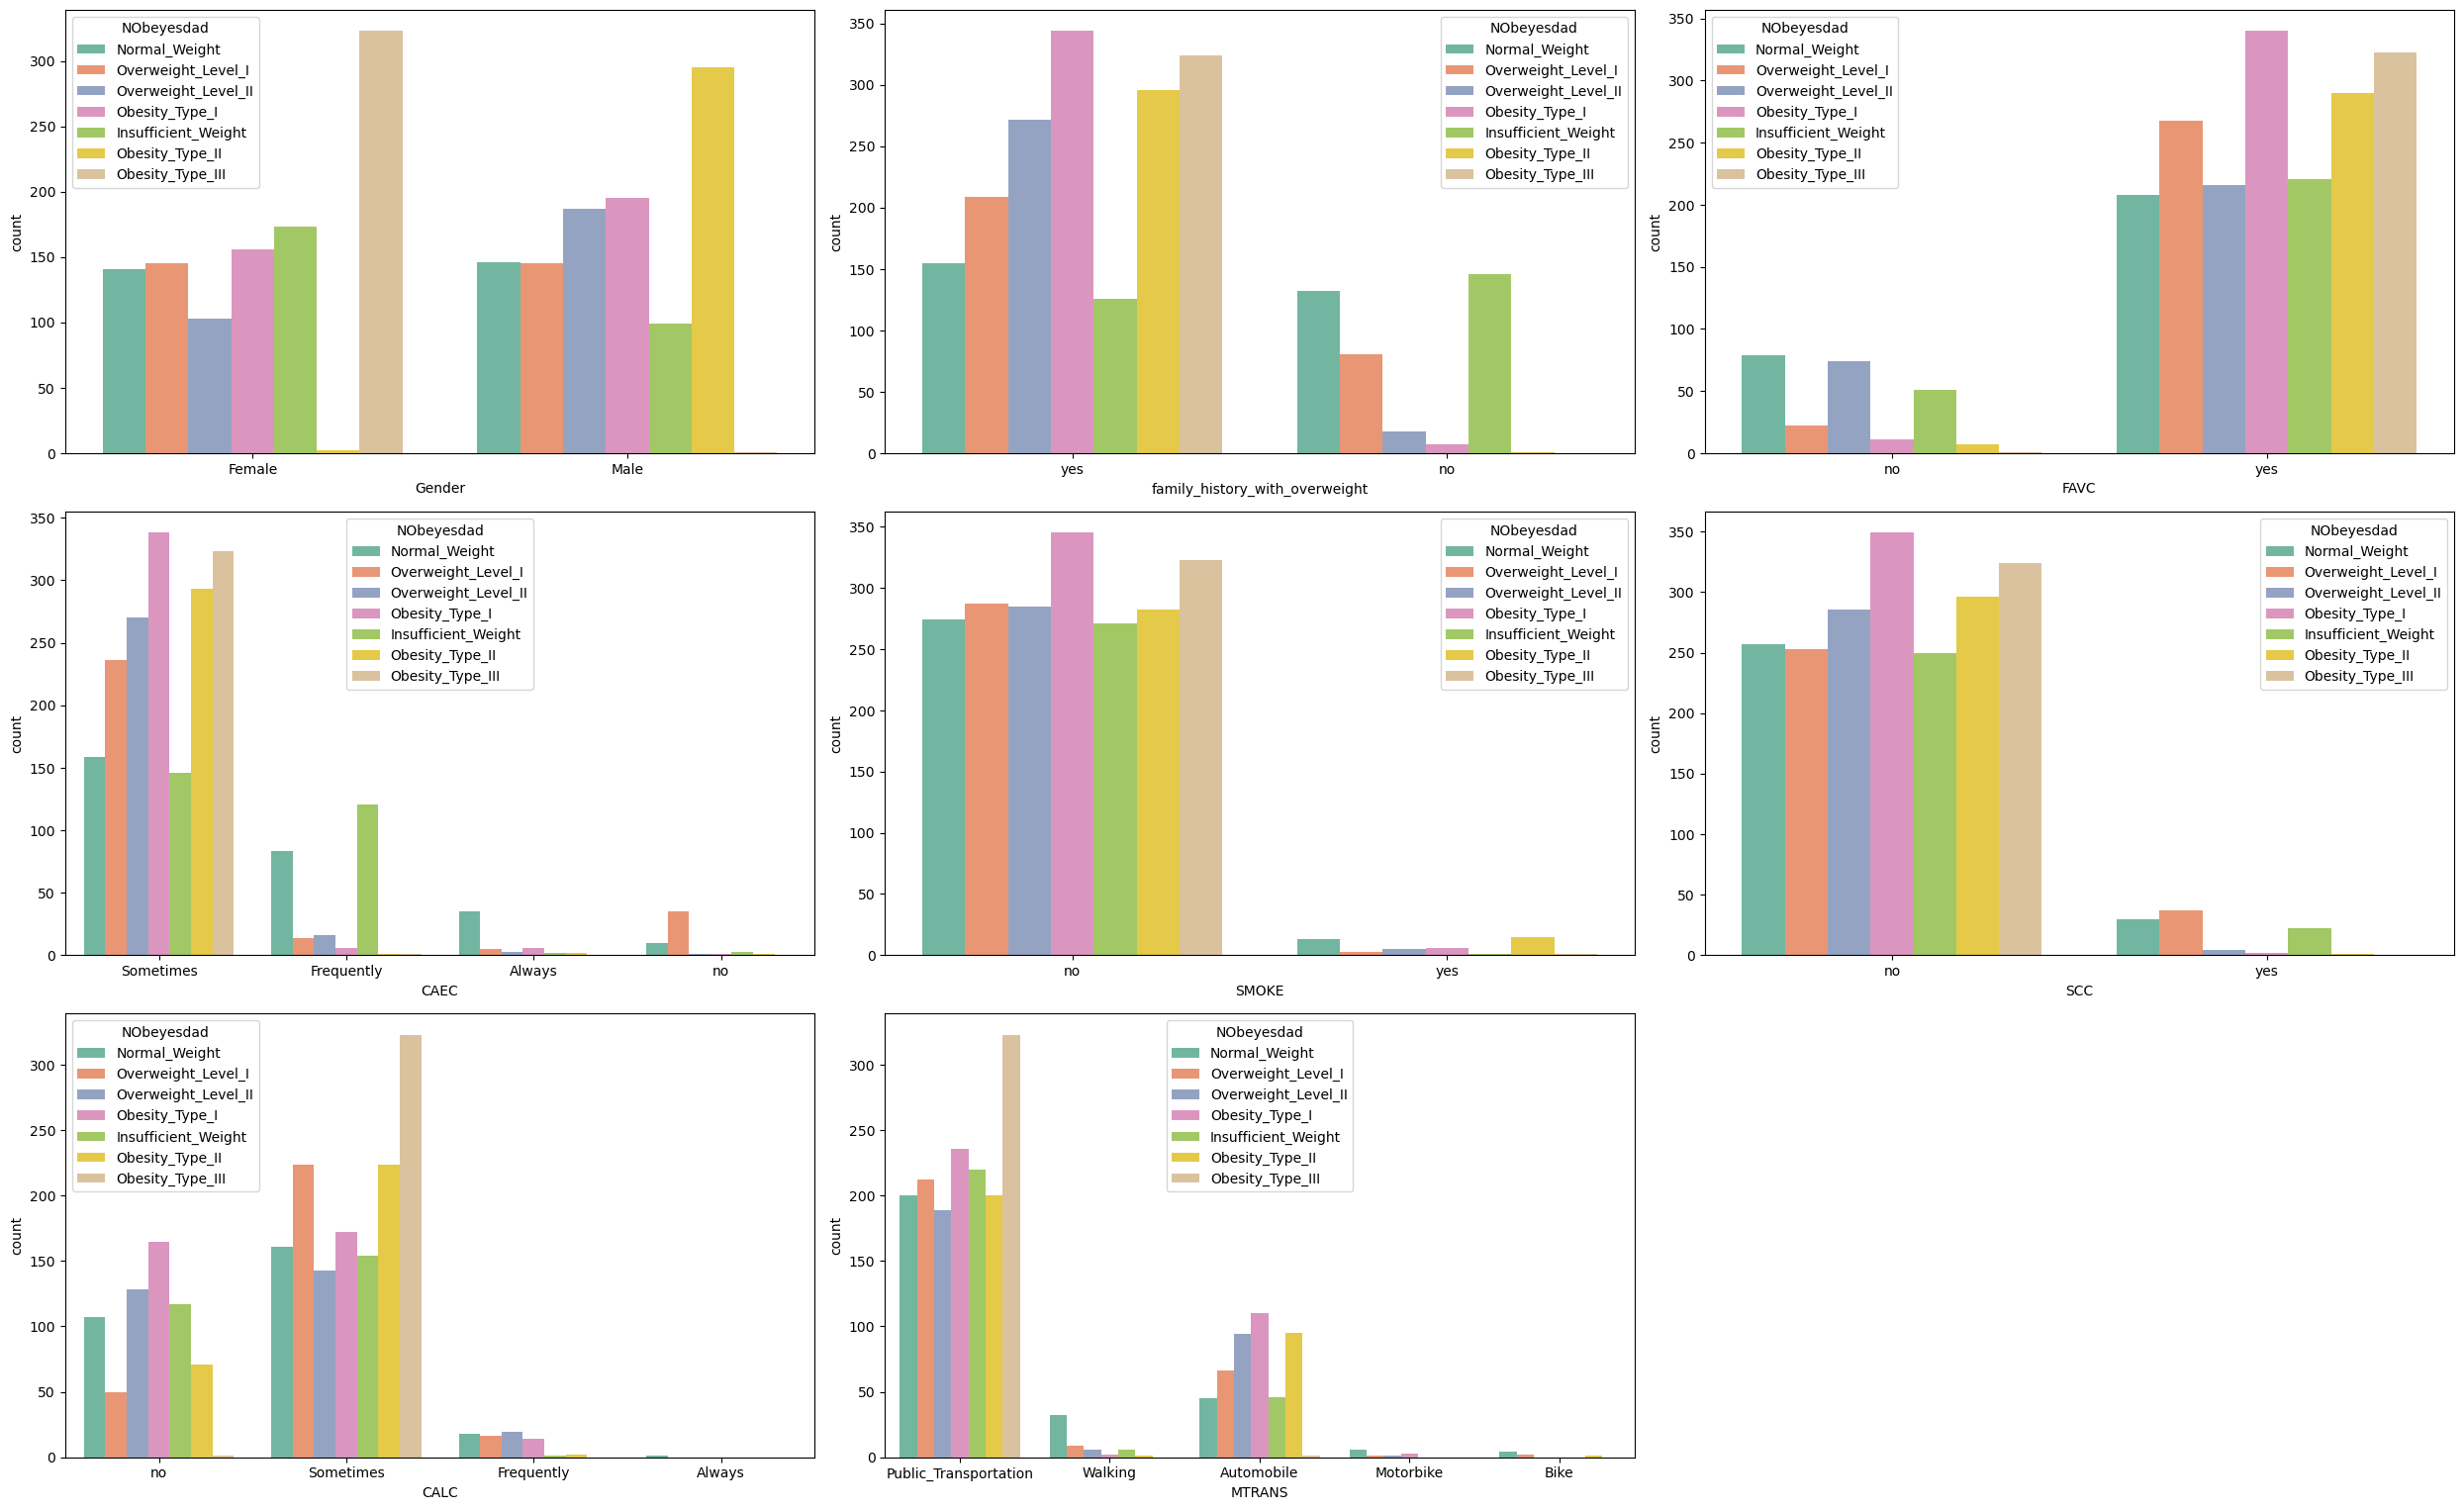

In [137]:
plt.figure(figsize=(25,20))
plt.subplot(4,3,1)
sns.countplot(x=df['Gender'],hue=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,2)
sns.countplot(x=df['family_history_with_overweight'],hue=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,3)
sns.countplot(x=df['FAVC'],hue=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,4)
sns.countplot(x=df['CAEC'],hue=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,5)
sns.countplot(x=df['SMOKE'],hue=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,6)
sns.countplot(x=df['SCC'],hue=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,7)
sns.countplot(x=df['CALC'],hue=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,8)
sns.countplot(x=df['MTRANS'],hue=df['NObeyesdad'],palette="Set2")

plt.tight_layout()

## Bivariate Analysis of Numerical Data

In [138]:
num_data=[features for features in df.columns if df[features].dtypes!='O']
num_data

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

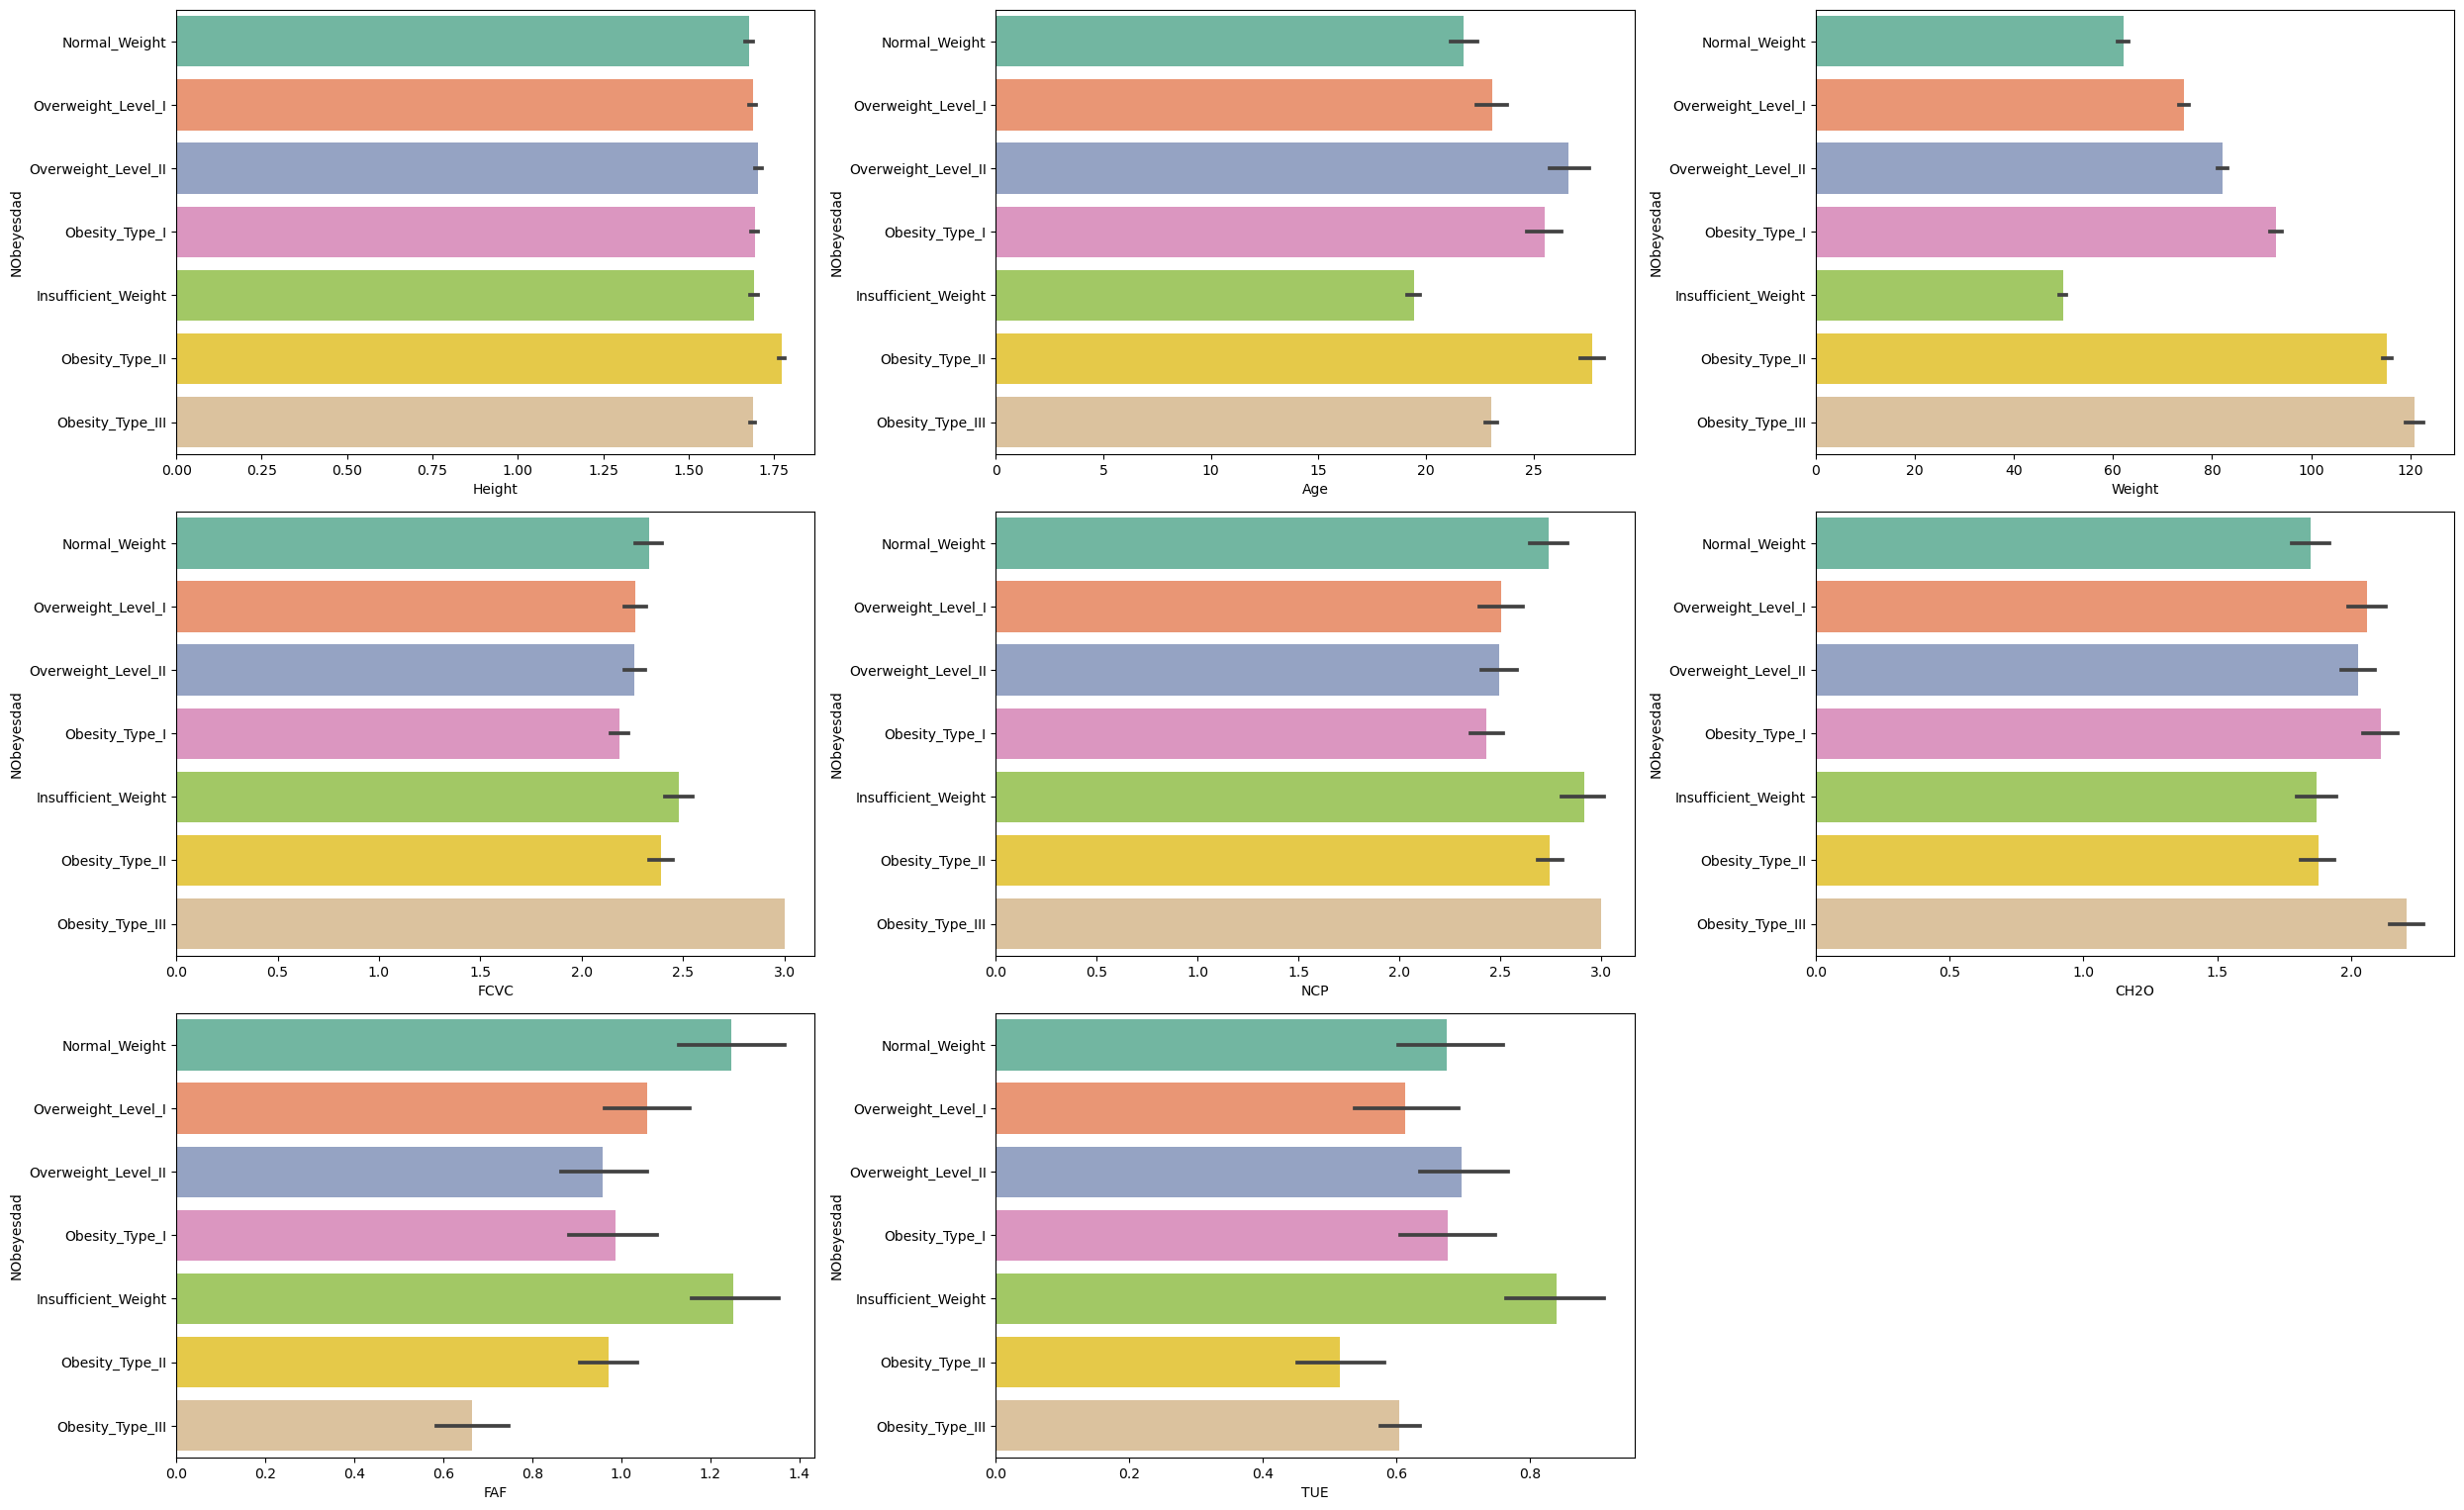

In [139]:
plt.figure(figsize=(25,20))
plt.subplot(4,3,1)
sns.barplot(x=df['Height'],y=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,2)
sns.barplot(x=df['Age'],y=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,3)
sns.barplot(x=df['Weight'],y=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,4)
sns.barplot(x=df['FCVC'],y=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,5)
sns.barplot(x=df['NCP'],y=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,6)
sns.barplot(x=df['CH2O'],y=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,7)
sns.barplot(x=df['FAF'],y=df['NObeyesdad'],palette="Set2")

plt.subplot(4,3,8)
sns.barplot(x=df['TUE'],y=df['NObeyesdad'],palette="Set2")

plt.tight_layout()

Insights:-
1. People with age between 0-20 are having normal weight , after that age either they start losing weight or gaining weight
2.The max weight which is the obesity III is almost 120 kg.
3.FCVC the consumption of vegtables is more in obesity III PEOPLE.
4.people with insufficient weight use more Electronics(TUE)
5.FAF ,normal weight people are more indulged into physical activity.


## Univariate Analysis of the distribution of the numerical data

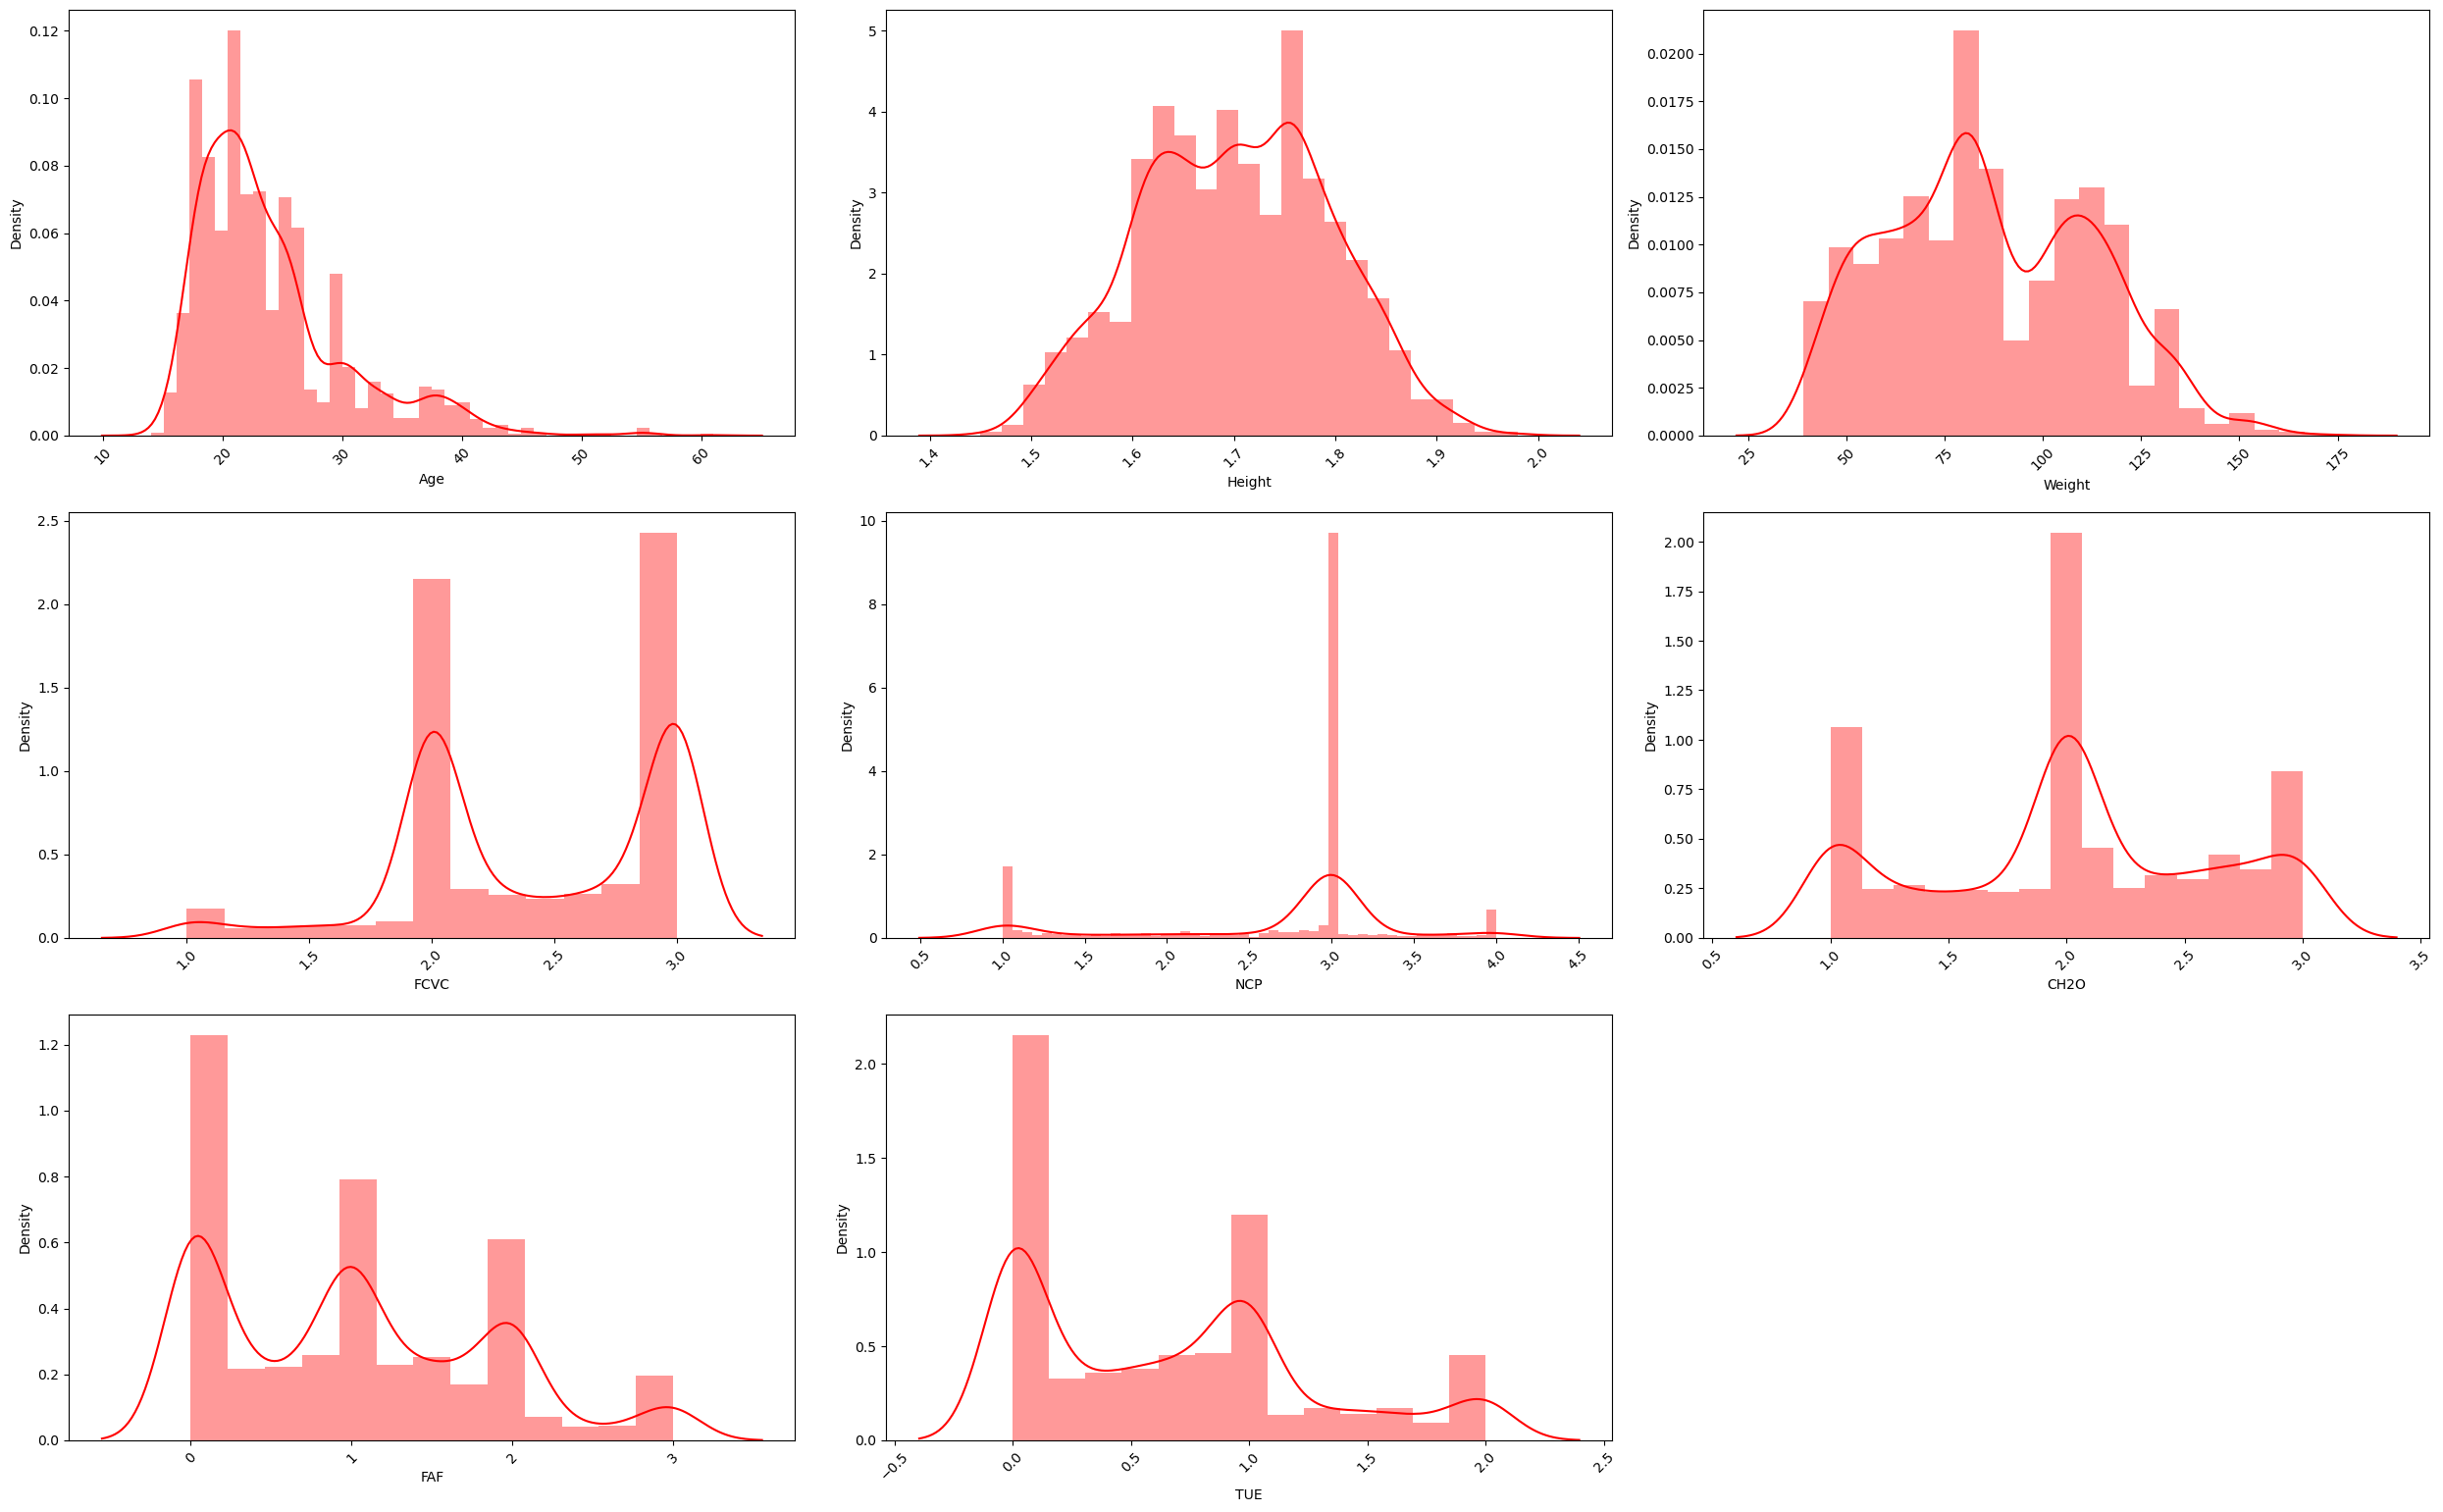

In [140]:
num_data=[features for features in df.columns if df[features].dtypes!='O']
plt.figure(figsize=(25,20))
for i in range(0,len(num_data)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[num_data[i]],color='r')
    plt.xticks(rotation=45)
    plt.xlabel(num_data[i])
    plt.tight_layout()


Insights:-
1. Age is right Skewed.
2. All other columns are randomly distributed.


### Corelation HeatMap

<AxesSubplot:>

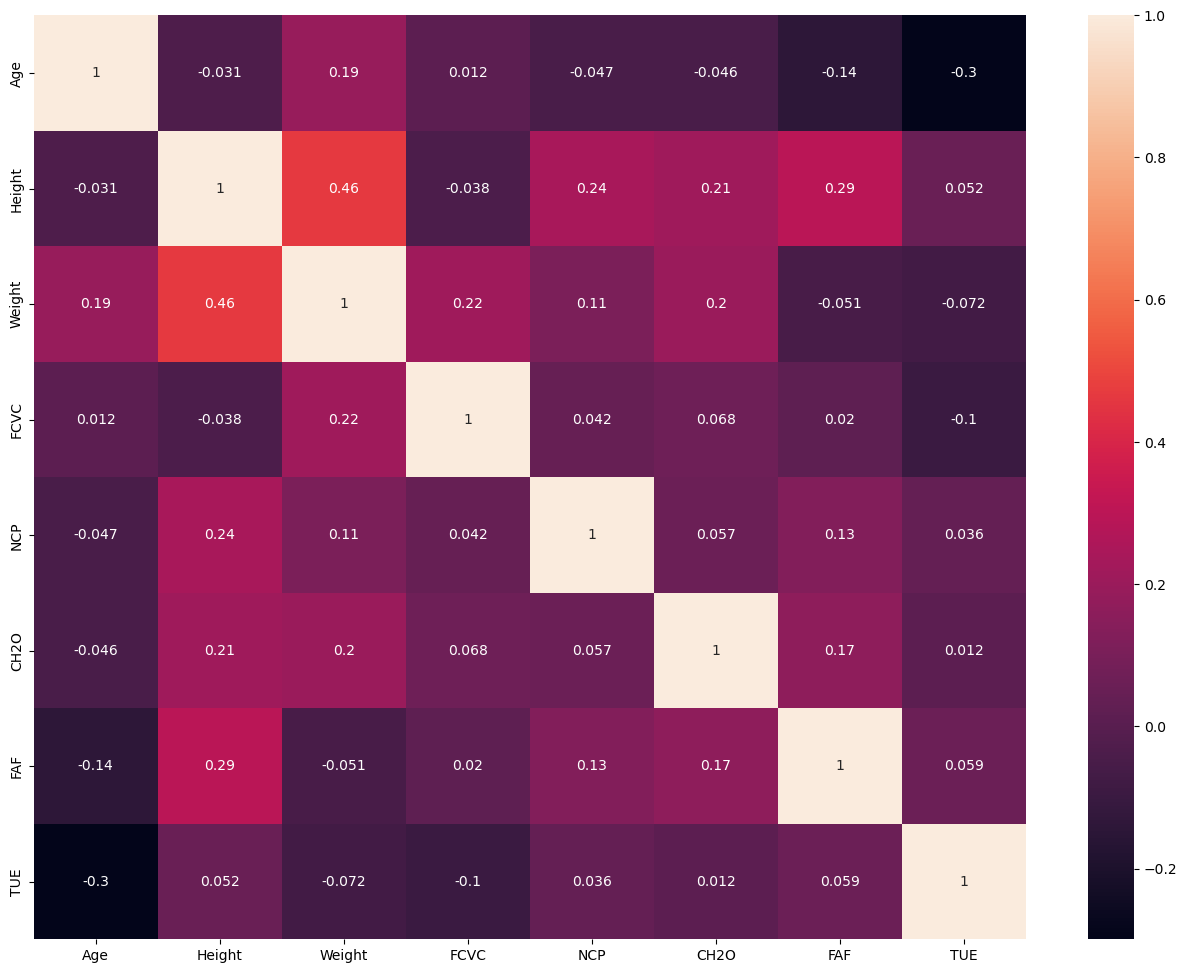

In [141]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

## Label encoding

In [142]:
category = [ 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in range(0,len(category)):
    df[category[i]]=label_encoder.fit_transform(df[category[i]])
    

In [143]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


## Creating Independent and Dependent Variables

In [144]:
X=df.drop(columns=['NObeyesdad'])

[0.15762875 0.01998336 0.26610239 0.47803043 0.00082993 0.02023027
 0.00731881 0.00449055 0.01218899 0.00375643 0.01482834 0.
 0.00393887 0.00380046 0.00348265 0.00338976]


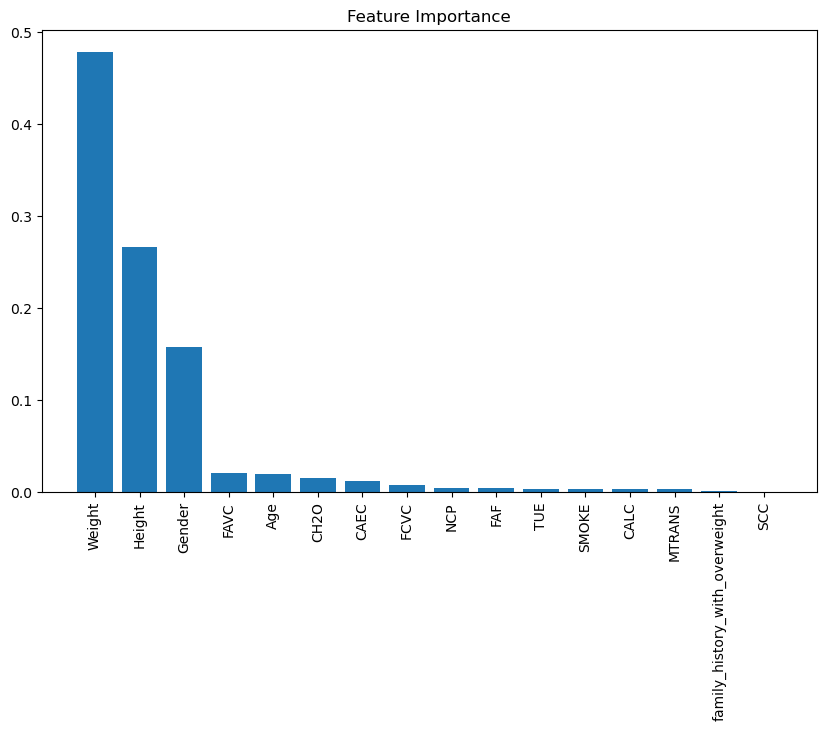

In [145]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)
print(tree.feature_importances_)

#Plotting a graph showing feature importance
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

Insights:-
1. The most important feature is the weighht height gender age favc
2. we only keep these and drop the rest.


## Feature Selection

In [151]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
y=df['NObeyesdad']

In [152]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.911937,Gender
1,1.954664,Age
2,2.627292,Height
3,2.226853,Weight
4,1.441725,family_history_with_overweight
5,1.166005,FAVC
6,1.228500,FCVC
7,1.108656,NCP
8,1.185699,CAEC
9,1.041151,SMOKE


## Splitting the data

In [153]:
#Dividing the dataset into training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y , test_size = 0.3, random_state = 0) 

## Model Implementation

### Logistic Regression

Train Accuracy of LR model is :  0.7718348002708192
Test Accuracy of LR model is :  0.7854889589905363
              precision    recall  f1-score   support

           0       0.96      0.88      0.91        98
           1       0.47      0.72      0.57        57
           2       0.76      0.74      0.75       106
           3       1.00      0.90      0.95       100
           4       1.00      0.96      0.98       105
           5       0.73      0.66      0.69        90
           6       0.52      0.55      0.54        78

    accuracy                           0.79       634
   macro avg       0.78      0.77      0.77       634
weighted avg       0.81      0.79      0.79       634

Confusion matrix of LR model is : [[ 86   3   0   0   0   0   1]
 [ 12  41   2   0   0  15  17]
 [  0   0  78   9   4   4   8]
 [  0   0   0  90   0   0   0]
 [  0   0   0   0 101   0   0]
 [  0   9   4   0   0  59   9]
 [  0   4  22   1   0  12  43]]


<AxesSubplot:>

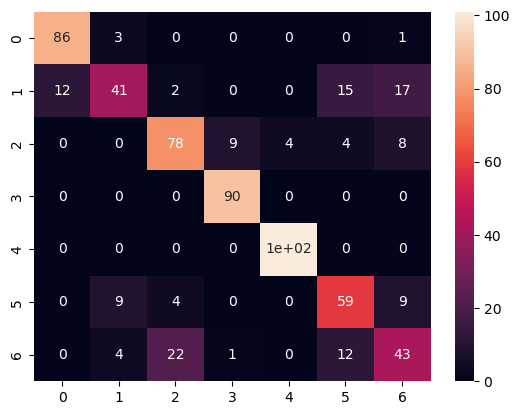

In [167]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

#Fitting the model
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train,y_train)

#Prediction on test data
y_pred1 = lr.predict(X_test)

#Prediction on train data
y_pred_train1 = lr.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of lr model
print("Train Accuracy of LR model is : ", accuracy_score(y_train,y_pred_train1))
print("Test Accuracy of LR model is : ", accuracy_score(y_test,y_pred1))
print(classification_report(y_pred1,y_test)) 

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred1)
print("Confusion matrix of LR model is :", confusion_matrix(y_test, y_pred1))
sns.heatmap(con_mat,annot=True)

### RandomForest Classifier

Train Accuracy of RF model is :  1.0
Test Accuracy of RF model is :  0.9574132492113565
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        89
           1       0.95      0.86      0.90        97
           2       0.98      0.97      0.98       104
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00       101
           5       0.86      0.96      0.91        73
           6       0.93      0.95      0.94        80

    accuracy                           0.96       634
   macro avg       0.95      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Confusion matrix of RF model is : [[ 86   4   0   0   0   0   0]
 [  3  83   0   0   0   1   0]
 [  0   1 101   0   0   0   1]
 [  0   0   0  90   0   0   0]
 [  0   0   0   0 101   0   0]
 [  0   8   0   0   0  70   3]
 [  0   1   3   0   0   2  76]]


<AxesSubplot:>

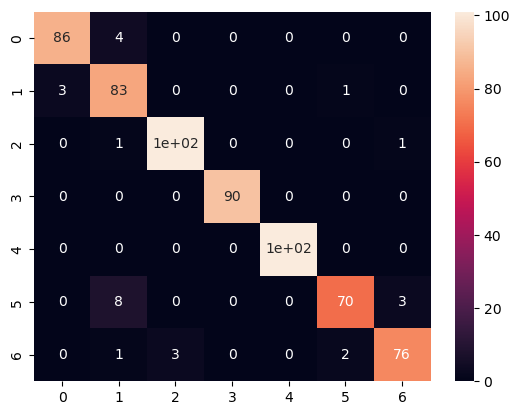

In [169]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Fitting the model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#Prediction on test data
y_pred2 = rf.predict(X_test)

#Prediction on train data
y_pred_train2 = rf.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of RF model
print("Train Accuracy of RF model is : ", accuracy_score(y_train,y_pred_train2))
print("Test Accuracy of RF model is : ", accuracy_score(y_test,y_pred2))
print(classification_report(y_pred2,y_test))

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred2)
print("Confusion matrix of RF model is :", confusion_matrix(y_test, y_pred2))
sns.heatmap(con_mat,annot=True)

### XGBoost Classifier

Train Accuracy of XGB model is :  1.0
Test Accuracy of XGB model is :  0.973186119873817
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.95      0.93      0.94        89
           2       1.00      0.96      0.98       107
           3       0.99      0.99      0.99        90
           4       0.99      1.00      1.00       100
           5       0.95      0.95      0.95        81
           6       0.94      0.99      0.96        78

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Confusion matrix of XGB model is : [[ 88   2   0   0   0   0   0]
 [  1  83   0   0   0   3   0]
 [  0   0 103   0   0   0   0]
 [  0   0   0  89   0   0   1]
 [  0   0   0   1 100   0   0]
 [  0   4   0   0   0  77   0]
 [  0   0   4   0   0   1  77]]


<AxesSubplot:>

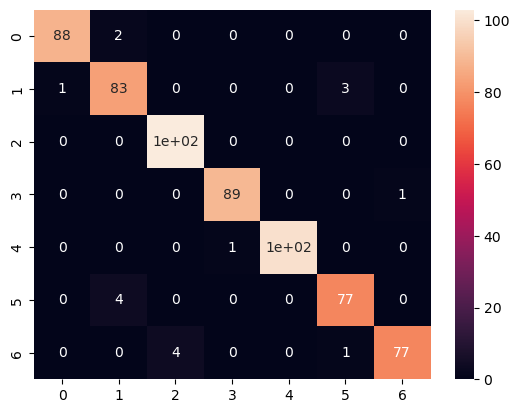

In [170]:
#Importing XGB classifier
from xgboost import XGBClassifier

#Fitting the model
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

#Prediction on test data
y_pred3 = xgb.predict(X_test)

#Prediction on train data
y_pred_train3 = xgb.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of XGB model
print("Train Accuracy of XGB model is : ", accuracy_score(y_train,y_pred_train3))
print("Test Accuracy of XGB model is : ", accuracy_score(y_test,y_pred3))
print(classification_report(y_pred3,y_test))

#Confusion matrix 
con_mat = confusion_matrix(y_test, y_pred3)
print("Confusion matrix of XGB model is :", confusion_matrix(y_test,y_pred3))
sns.heatmap(con_mat,annot=True)

### Naive Baye's Classifier

Train Accuracy of nbc model is :  0.5443466486120515
Test Accuracy of nbc model is :  0.5725552050473186
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       201
           1       0.05      0.25      0.08        16
           2       0.77      0.44      0.56       178
           3       0.82      0.73      0.77       102
           4       0.99      0.98      0.99       102
           5       0.09      0.39      0.14        18
           6       0.12      0.59      0.20        17

    accuracy                           0.57       634
   macro avg       0.55      0.55      0.48       634
weighted avg       0.83      0.57      0.65       634

Confusion matrix of nbc model is : [[ 89   1   0   0   0   0   0]
 [ 72   4   2   0   1   6   2]
 [  0   2  79  18   1   1   2]
 [  0   0  14  74   0   0   2]
 [  0   1   0   0 100   0   0]
 [ 32   4  37   0   0   7   1]
 [  8   4  46  10   0   4  10]]


<AxesSubplot:>

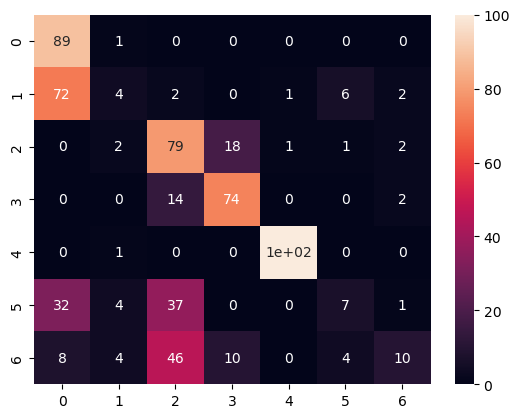

In [172]:
#Importing Naive Baye's Classifier
from sklearn.naive_bayes import GaussianNB

#Fitting the model
nbc = GaussianNB()
nbc.fit(X_train, y_train)

#Prediction on test data
y_pred4 = nbc.predict(X_test)

#Prediction on train data
y_pred_train4 = nbc.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of NBC model
print("Train Accuracy of nbc model is : ", accuracy_score(y_train,y_pred_train4))
print("Test Accuracy of nbc model is : ", accuracy_score(y_test,y_pred4))
print(classification_report(y_pred4 ,y_test))

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred4)
print("Confusion matrix of nbc model is :", confusion_matrix(y_test,y_pred4))
sns.heatmap(con_mat,annot=True)

## XGBoost Classifier has given the best results as compared to the other algorithms

Accuracy - 0.97

precision - 0.98 

recall - 0.99 

f1-score - 0.98   

## Hypertuning with RandomizedSearchCV

In [173]:
#Importing RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVR

#Create the parameter grid based on the results of random search
svm_model = SVR()
rf= XGBClassifier()

parameters = {'max_depth':[50, 100, None],
              'max_leaf_nodes':[500,1000, None],
             'n_estimators': [50, 100, 200]}
             
random_search = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 10, 
                               cv = 3, verbose= 1, random_state= 101, n_jobs = -1)


In [174]:
#Fit the random search to the data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                            

In [175]:
random_search.best_params_

{'n_estimators': 50, 'max_leaf_nodes': None, 'max_depth': None}

In [176]:
best_random = random_search.best_estimator_
best_random.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaf_nodes=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Train Accuracy of model is :  1.0
Test Accuracy of model is :  0.973186119873817
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.95      0.94      0.95        88
           2       1.00      0.96      0.98       107
           3       1.00      0.99      0.99        91
           4       0.99      1.00      1.00       100
           5       0.95      0.94      0.94        82
           6       0.93      0.99      0.96        77

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Confusion matrix of model is : [[ 88   2   0   0   0   0   0]
 [  1  83   0   0   0   3   0]
 [  0   0 103   0   0   0   0]
 [  0   0   0  90   0   0   0]
 [  0   0   0   1 100   0   0]
 [  0   3   0   0   0  77   1]
 [  0   0   4   0   0   2  76]]


<AxesSubplot:>

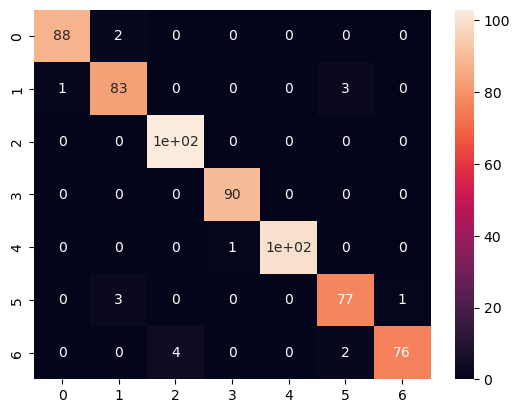

In [178]:
#Prediction on test data
y_pred5 = best_random.predict(X_test)

#Prediction on train data
y_pred_train5 = best_random.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of NBC model
print("Train Accuracy of model is : ", accuracy_score(y_train,y_pred_train5))
print("Test Accuracy of model is : ", accuracy_score(y_test,y_pred5))
print(classification_report(y_pred5 ,y_test))

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred5)
print("Confusion matrix of model is :", confusion_matrix(y_test,y_pred5))
sns.heatmap(con_mat,annot=True)

### Conclusion:

After hypertuning there was not much change in the values sowe can say our model has an 

Accuracy - 0.97

precision - 0.98

recall - 0.99

f1-score - 0.98 